# Name: << Xinlai Chen >>

### Test 2B (Computer Programming) Winter 2019-20

**Directions** You may use your notes and/or web resources. You must do your own work.

The file `MPG_train.csv` contains data that you will use to train a Naive Bayes classifier to predict the fuel economy `MPG` (Low, Medium, High) of a vehicle. You will be asked to:

* provide a baseline error rate.
* validation error rate for your trained Naive Bayes classifier.
* predictions of the fuel economy corresponding to attributes provided in the file `MPG_attributes_test.csv`.

**Make sure that you run your entire notebook from beginning to end before submitting it to the Moodle drop box in both `.ipynb` and `.html` format.** 

When you are done, submit the following **three** files to the Moodle drop box. Note **username** is your user name:

* T2_username.ipynb
* T2_username.html
* MPG_predict_username.csv

In [1]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import GridSearchCV
from matplotlib import pyplot as plt

# 1. Baseline Error Rate

In [2]:
# Directions: In this cell, load MPG_train.csv into the data frame df. 
#             Modify the path to the csv file as needed.
df = pd.read_csv('./MPG_train.csv')
df.head(3)

,Displ,Cyl,Drive,Class,MPG
0,3.7,6,4WD,SUV,L
1,3.5,6,2WD,midsize car,M
2,3.7,6,4WD,midsize car,L


#### Check: The output of `df.head(3)` should be the same as the table below:
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>Displ</th>
      <th>Cyl</th>
      <th>Drive</th>
      <th>Class</th>
      <th>MPG</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>0</th>
      <td>3.7</td>
      <td>6</td>
      <td>4WD</td>
      <td>SUV</td>
      <td>L</td>
    </tr>
    <tr>
      <th>1</th>
      <td>3.5</td>
      <td>6</td>
      <td>2WD</td>
      <td>midsize car</td>
      <td>M</td>
    </tr>
    <tr>
      <th>2</th>
      <td>3.7</td>
      <td>6</td>
      <td>4WD</td>
      <td>midsize car</td>
      <td>L</td>
    </tr>
  </tbody>
</table>


In [3]:
# Directions: In the cells below this line, compute a baseline error rate. 
#             Your answer should be assigned to the variable: baseline_error_rate.

In [4]:
#df['MPG'] = pd.qcut(df.MPG, q=3, labels = ['M','L','H'])
df['Displ'] = pd.qcut(df.Displ, q=3, labels = ['bad','median','good'])
df['Cyl='] = pd.qcut(df.Cyl, q=3, labels = ['bad','median','good'])

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 957 entries, 0 to 956
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype   
---  ------  --------------  -----   
 0   Displ   957 non-null    category
 1   Cyl     957 non-null    int64   
 2   Drive   957 non-null    object  
 3   Class   957 non-null    object  
 4   MPG     957 non-null    object  
 5   Cyl=    957 non-null    category
dtypes: category(2), int64(1), object(3)
memory usage: 32.1+ KB


In [6]:
#df['Displ'] = df['Displ'].astype('category')
#df['Cyl'] = df['Cyl'].astype('category')

In [7]:
#df

In [8]:
#df.info()

In [9]:
target = df.MPG
attributes = df.drop(['MPG'], axis = 1)
attributes = pd.get_dummies(attributes)

In [10]:
attributes

,Cyl,Displ_bad,Displ_median,Displ_good,Drive_2WD,Drive_4WD,Class_SUV,Class_large car,Class_midsize car,Class_minivan,Class_pickup,Class_small car,Class_special purpose,Class_station wagon,Class_van,Cyl=_bad,Cyl=_median,Cyl=_good
0,6,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,1,0
1,6,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0
2,6,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0
3,4,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0
4,4,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
952,6,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0
953,6,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0
954,6,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0
955,6,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0


In [11]:
target.value_counts()

L    356
M    309
H    292
Name: MPG, dtype: int64

In [12]:
1 - (356/(356+309+292))

0.6280041797283177

In [13]:
baseline_error_rate = round(1 - target.value_counts().max() / target.shape[0],3)

In [14]:
# Directions: DO NOT MODIFY THIS CELL. It prints out your baseline error rate.
print('baseline error rate:',baseline_error_rate)

baseline error rate: 0.628


# 2. Naive Bayes Classifier

In [15]:
# Directions: In the cells below this line, train a Naive Bayes classifier using the 
#             training data contained in df. Your validation error rate should be named
#             validation_error_rate.

In [16]:
hparam = {'alpha':np.arange(1,1001)}

In [17]:
NBayes = MultinomialNB()
NBayesCV = GridSearchCV(NBayes,param_grid=hparam,n_jobs=-1) 
NBayesCV.fit(attributes,target)

GridSearchCV(estimator=MultinomialNB(), n_jobs=-1,
             param_grid={'alpha': array([   1,    2,    3,    4,    5,    6,    7,    8,    9,   10,   11,
         12,   13,   14,   15,   16,   17,   18,   19,   20,   21,   22,
         23,   24,   25,   26,   27,   28,   29,   30,   31,   32,   33,
         34,   35,   36,   37,   38,   39,   40,   41,   42,   43,   44,
         45,   46,   47,   48,   49,   50,   51,   52,   53,   54,   55,
         56,   57,   58,   59,   60,   61,   62,   63,   64,   65,   66,
         67,   68,   69,   70,   71,   72,   73,   74,   75,   76,   77,
         78,   79,   80,   81,   82,   83,   84,   85,   86,   87,   88,
         89,   90,   91,   92,   93,   94,   9...
        914,  915,  916,  917,  918,  919,  920,  921,  922,  923,  924,
        925,  926,  927,  928,  929,  930,  931,  932,  933,  934,  935,
        936,  937,  938,  939,  940,  941,  942,  943,  944,  945,  946,
        947,  948,  949,  950,  951,  952,  953,  954,  955,  

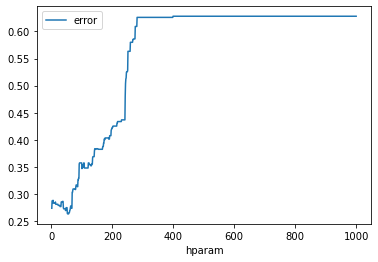

In [18]:
results = pd.DataFrame()
results['hparam'] = hparam['alpha']
results['error'] = 1 - NBayesCV.cv_results_['mean_test_score']
results.plot.line(x='hparam', y='error')

In [19]:
validation_error_rate = round(1 - NBayesCV.best_score_, 3)

In [20]:
# DO NOT MODIFY THIS CELL. It prints out your validation error rate
print('Naive Bayes validation error rate:',validation_error_rate)

Naive Bayes validation error rate: 0.263


# 3. Predictions
#### Predict the fuel economy `MPG` (Low, Medium, High) corresponding to the attributes given in the file `MPG_attributes_test.csv`. 

In [21]:
# Directions: In this cell, load the fuel economy attributes to be used for making your predictions.
attributes_test = pd.read_csv('./MPG_attributes_test.csv')
attributes_test.head(10)

,Displ,Cyl,Drive,Class
0,3.0,6,2WD,small car
1,3.0,6,2WD,small car
2,2.4,4,4WD,small car
3,6.2,8,2WD,pickup
4,2.5,4,2WD,midsize car
5,3.2,6,2WD,SUV
6,2.9,4,4WD,pickup
7,3.7,6,2WD,midsize car
8,1.6,4,2WD,small car
9,5.5,12,2WD,large car


#### Check: The output of `attributes_test.head(3)` should be the same as table below:

<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>Displ</th>
      <th>Cyl</th>
      <th>Drive</th>
      <th>Class</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>0</th>
      <td>3.0</td>
      <td>6</td>
      <td>2WD</td>
      <td>small car</td>
    </tr>
    <tr>
      <th>1</th>
      <td>3.0</td>
      <td>6</td>
      <td>2WD</td>
      <td>small car</td>
    </tr>
    <tr>
      <th>2</th>
      <td>2.4</td>
      <td>4</td>
      <td>4WD</td>
      <td>small car</td>
    </tr>
  </tbody>
</table>


In [22]:
# Directions: In the cells below this line, predict the fuel economy (L,M,H) for the test attributes.
#             Your predictions should be a single column data frame named MPG_predictions.

In [23]:
attributes_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 958 entries, 0 to 957
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Displ   958 non-null    float64
 1   Cyl     958 non-null    int64  
 2   Drive   958 non-null    object 
 3   Class   958 non-null    object 
dtypes: float64(1), int64(1), object(2)
memory usage: 30.1+ KB


In [24]:
#attributes_test['Displ'] = attributes_test['Displ'].astype('category')
#attributes_test['Cyl'] = attributes_test['Cyl'].astype('category')
attributes_test['Displ'] = pd.qcut(attributes_test.Displ, q=3, labels = ['bad','median','good'])
attributes_test['Cyl'] = pd.qcut(attributes_test.Cyl, q=3, labels = ['bad','median','good'])

In [25]:
#attributes_test = attributes_test.drop(['Displ','Cyl'], axis = 1)
#attributes_test = attributes_test.rename(columns = {"Displcut":"Displ"})
#attributes_test = attributes_test.rename(columns = {"Cylcut":"Cyl"})

In [26]:
attributes_test

,Displ,Cyl,Drive,Class
0,median,median,2WD,small car
1,median,median,2WD,small car
2,bad,bad,4WD,small car
3,good,good,2WD,pickup
4,bad,bad,2WD,midsize car
...,...,...,...,...
953,bad,bad,2WD,midsize car
954,bad,bad,2WD,station wagon
955,bad,bad,2WD,midsize car
956,bad,bad,2WD,midsize car


In [27]:
attributes_test = pd.get_dummies(attributes_test)
MPG_predictions = NBayesCV.predict(attributes_test)

ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 18 is different from 17)

In [ ]:
attributes_test

In [ ]:
# Directions: This cell checks that your predictions are contained 
#             in a single column dataframe called MPG_predictions
MPG_predictions = pd.DataFrame(MPG_predictions,columns=['MPG'])
MPG_predictions.head(3)

#### Check: The output of `MPG_predictions.head(3)` should be **similar** to the table below:

<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>MPG</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>0</th>
      <td>M</td>
    </tr>
    <tr>
      <th>1</th>
      <td>M</td>
    </tr>
    <tr>
      <th>2</th>
      <td>H</td>
    </tr>
  </tbody>
</table>

In [ ]:
# DO NOT MODIFY THIS CELL. It saves your predictions to a 
# csv file called MPG_predictions.csv
MPG_predictions.to_csv('./MPG_prediction.csv',index=False)